In [ ]:
# 180 페이지
!git clone https://github.com/sangsucki/DataDrivenReport.git

fatal: destination path 'DataDrivenReport' already exists and is not an empty directory.


In [ ]:
import pandas as pd
df = pd.read_excel('/content/DataDrivenReport/population.xlsx')
df.head()

,y_birth,y_enter,y_retire,sex
0,1965.0,2021,NaN,남자
1,1966.0,1992,NaN,남자
2,1973.0,1998,NaN,남자
3,1982.0,2008,NaN,남자
4,1987.0,2013,NaN,남자


In [ ]:
df.info()
# y_birth : 출생년도
# y_enter : 입사연도
# y_retire : 퇴직연도
# sex : 성별

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76883 entries, 0 to 76882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   y_birth   76882 non-null  float64
 1   y_enter   76883 non-null  int64  
 2   y_retire  52899 non-null  float64
 3   sex       76883 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ MB


In [ ]:
# EDA 수행하기
# 데이터 훑어보기, 데이터 타입 확인 -> 결측치 처리 -> 이상치 처리 -> 종속변수 분포 확인 -> 파생변수 추가
!pip install ydata_profiling

#1) 데이터 훑어보기, 데이터 타입 확인
import ydata_profiling
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

pr = ProfileReport(df)
pr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=932cc24bbe6c3a89ba60a7c810c0416a01e7663c6b311e56f2af164d9d891ae2
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# 2) 결측치 처리
# y_enter, sex 의 행 개수 76,883. y_birth 행 개수 76,882 이므로 차이가 있을 수 있어 확인 필요
df[df['y_birth'].isnull()]

# y_birth 가 누락되어있는 것 확인 가능 -> 삭제 필요

df.dropna(subset=['y_birth'], inplace=True)
# noto sans CJK KR 폰트 변경

In [10]:
len(df)

76882

In [11]:
# 3) 이상치 처리
df.describe()

,y_birth,y_enter,y_retire
count,76882.000000,76882.000000,52898.000000
mean,1962.797794,1988.927317,1998.439695
std,17.860491,16.274265,10.726348
min,1900.000000,1940.000000,1965.000000
25%,1952.000000,1978.000000,1993.000000
50%,1963.000000,1987.000000,2001.000000
75%,1973.000000,1997.000000,2001.000000
max,2003.000000,2021.000000,2021.000000


In [12]:
# 4) 종속변수 분포 확인
df['y_enter'].value_counts()

y_enter
1979    3512
1978    2589
1992    2558
1996    2368
1995    2264
        ... 
1954      20
1946      15
1944       9
1943       6
1941       1
Name: count, Length: 81, dtype: int64

<Axes: xlabel='y_enter'>

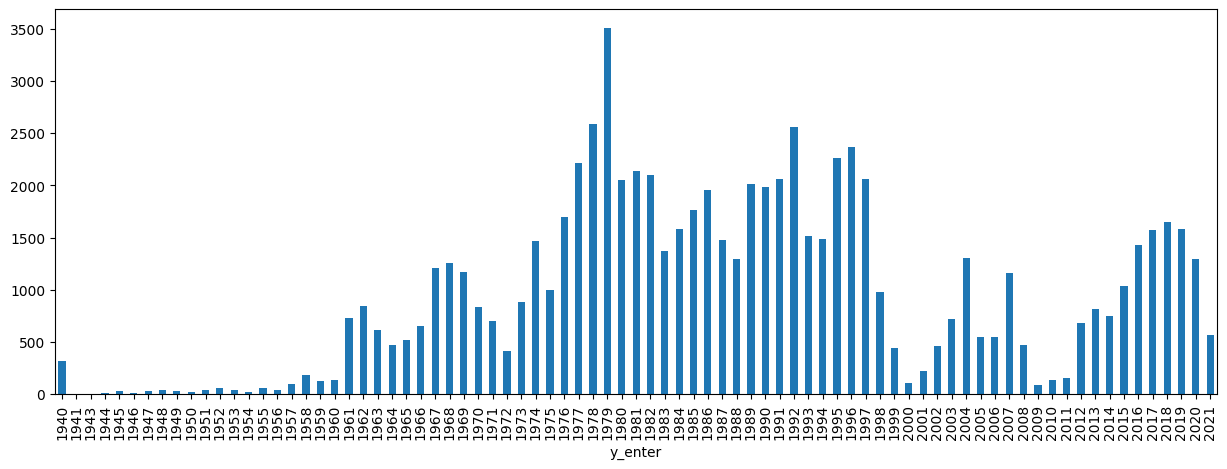

In [14]:
df['y_enter'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))

In [18]:
# 2010년 말 기준 직원수 계산
# 입사연도가 2010 년 이하면서
df2010 = df[(df['y_enter'] <= 2010)]
# 2010년 이후에 퇴사한, 그리고 현직인(null 값) 직원
df2010s = df2010[(df2010['y_retire'].isnull()) | (df2010['y_retire'] > 2010)]
len(df2010s)

19914

In [19]:
# 5) 파생변수 추가
# 해당 연도에서 연령을 추가로 만들어 새로운 열에 저장
# 2010년 기준 나이 계산 및 새 열 만들기
df2010s['age'] = 2010 - df2010s['y_birth']

<ipython-input-19-e7f1d993760b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2010s['age'] = 2010 - df2010s['y_birth']


In [24]:
df2010s.describe()

,y_birth,y_enter,y_retire,age
count,19914.000000,19914.000000,6921.000000,19914.000000
mean,1967.088681,1992.060360,2016.385638,42.911319
std,8.735980,9.969122,3.020827,8.735980
min,1939.000000,1969.000000,2011.000000,20.000000
25%,1959.000000,1983.000000,2014.000000,36.000000
50%,1967.000000,1992.000000,2017.000000,43.000000
75%,1974.000000,2002.000000,2019.000000,51.000000
max,1990.000000,2010.000000,2021.000000,71.000000


In [26]:
# reset_indeX() 하는 이유 : 각 행에 고유 숫자를 매겨서 다음에 진행할 ㅇ녀령별 인원수에 활용할 예정이라
df2010_m = df2010s[df2010s['sex'] == '남자'].reset_index()
df2010_f = df2010s[df2010s['sex'] == '여자'].reset_index()

print(len(df2010_m), len(df2010_f))

16932 2982


In [27]:
# 위의 reset_index로 만든 index를 기준으로 연령별 인원수 계산.
# 연령별 인원수 계산
df2010_mp = df2010_m.groupby("age")['index'].count()
df2010_fp = df2010_f.groupby("age")['index'].count()


In [28]:
df2010_mp.head()

age
20.0    10
21.0    12
22.0     8
23.0    10
24.0    10
Name: index, dtype: int64

In [29]:
df2010_fp.head()

age
20.0    2
22.0    1
23.0    1
24.0    8
25.0    8
Name: index, dtype: int64

In [31]:
# 행 병합을 위해 서로 맞지않는 index를 reset
df2010t = pd.concat([df2010_mp, df2010_fp], axis=1).reset_index()
df2010t.columns = ['연령', '남자', '여자']

In [32]:
df2010t.head()

,연령,남자,여자
0,20.0,10,2.0
1,21.0,12,NaN
2,22.0,8,1.0
3,23.0,10,1.0
4,24.0,10,8.0


In [33]:
# 정년은 60세로 동일하게 설정해두기 위해 연령이 넘어가는 인원 삭제
df2010t = df2010t[df2010t['연령']<=60]

In [34]:
df2010t.describe()

,연령,남자,여자
count,40.000000,40.000000,38.000000
mean,39.500000,423.250000,78.473684
std,11.690452,257.332644,65.160400
min,20.000000,8.000000,1.000000
25%,29.750000,255.750000,18.250000
50%,39.500000,485.500000,60.000000
75%,49.250000,588.500000,135.500000
max,59.000000,809.000000,207.000000


In [41]:
##   2020년도 같은 방식으로 계산
# 입사연도가 2020 년 이하면서
df2020 = df[(df['y_enter'] <= 2020)]
# 2010년 이후에 퇴사한, 그리고 현직인(null 값) 직원
df2020s = df2020[(df2020['y_retire'].isnull()) | (df2020['y_retire'] > 2020)]
len(df2020s)

23873

In [42]:
# 2020년도 기준 연령 추가
df2020s['age'] = 2020 - df2020s['y_birth']

<ipython-input-42-6d5296ca9105>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020s['age'] = 2020 - df2020s['y_birth']


In [43]:
# reset_indeX() 하는 이유 : 각 행에 고유 숫자를 매겨서 다음에 진행할 연령별 인원수에 활용할 예정이라
df2020_m = df2020s[df2020s['sex'] == '남자'].reset_index()
df2020_f = df2020s[df2020s['sex'] == '여자'].reset_index()

In [44]:
df2020_mp = df2020_m.groupby("age")['index'].count()
df2020_fp = df2020_f.groupby("age")['index'].count()

df2020t = pd.concat([df2020_mp, df2020_fp], axis=1).reset_index()
df2020t.columns = ['연령', '남자', '여자']

df2020t = df2020t[df2020t['연령']<=60]

In [45]:
df2020t

,연령,남자,여자
0,18.0,1,1.0
1,19.0,10,19.0
2,20.0,55,26.0
3,21.0,118,47.0
4,22.0,140,54.0
5,23.0,135,104.0
6,24.0,184,188.0
7,25.0,313,263.0
8,26.0,594,320.0
9,27.0,754,303.0


In [ ]:
## 196 페이지

# 존재하지않는 2030년의 데이터 예측
# 통계청에서 인구 시계열 예측을 위해 주로 사용하는 코호트 요인법 사용
# 코호트요인 : 유입과 유출에 대한 그룹을 세분화하고 각각의 모델을 만들어 예측하는 방식. 채용의 경우 유입과 유출이 입사와 퇴사로 명확한 정의가 있지만 환경 변화에 따른 정부 정책, 회사 정책으로 대졸,고졸,전문 인력 채용이 달라지므로 각각의 상황에서 연령별 인력 변화를 예측하기 쉽지 않다. 퇴사의 경우에도 직급별, 연령별 퇴사율과 같은 정보가 공개되지 않았기 때문에 주어진 자료로 분석하기 위해서 다른 방법을 고민할 필요 있음.

# 시계열예측 방법 중 가장 간단한 이동평균법으로 계산
# 차기 예측치를 현시점에서 가까운 n개의 데이터를 평균하여 구하는 방식

#이 예시에서는 가까운 5개년 데이터 적용, 2021년의 연령별 성별 인원을 예측하기 위해서는 16년부터 20년까지의 연령별 성별을 구분한 인원수가 필요. 앞에서 10년과 20년 연령별 성별을 구분한 인원수 테이블을 구할 때 사용했던 방식을 똑같이 적용해 2016년부터 2020년까지 5번 반복. def문을 통해 함수로 정의.
